In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

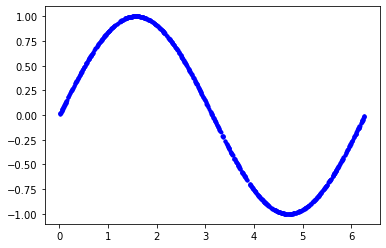

In [7]:
# 100개의 데이터 샘플을 생성합니다.
SAMPLES = 1000

# 임의의 시드값을 지정하여 이 노트북에서 실행할 때마다 다른 랜던값을 얻게 합니다.
SEED = 1357
np.random.seed(SEED)
tf.random.set_seed(SEED)

# 사인파 진폭의 범위인 0부터 2*PI내에서 균일하게 분포된 난수 집합을 1000개 생성합니다.
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# 값을 무작위로 섞어서 생성된 값들이 딥러닝 훈련 과정에 순서를 포함하지 못하도록 합니다.
np.random.shuffle(x_values)

# 사인 값을 계산합니다.
y_values = np.sin(x_values)

# 데이터를 그래프로 그립니다. 
# 'b.'로 파란색의 그래프를 그리도록 합니다. 만일 붉은 색으로 변경한다면 'r.'과 같이 사용할 수 있습니다.
plt.plot(x_values, y_values, 'b.')
plt.show()

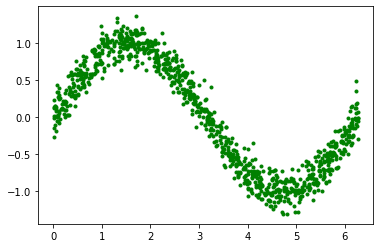

In [10]:
# 상단의 잘 그려진 sin()그래프 대신 잡음 속에서 패턴을 선별할 수 있도록 노이즈를 더하도록 합니다.
y_values += 0.1 * np.random.randn(*y_values.shape)

plt.plot(x_values, y_values, 'g.')
plt.show()

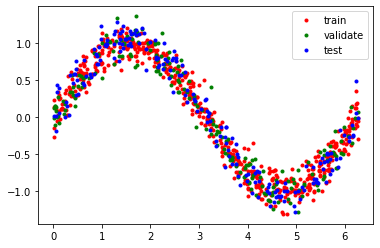

In [13]:
# 데이터셋을 훈련, 검증, 테스트의 세 부분으로 분할합니다.
# 각 셋은 훈련셋 60%, 테스트셋 20%, 검증셋 20%로 분리하도록 하겠습니다.
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# np.split은 데이터를 분할할때 사용됩니다.
# np.split의 두 번째 파라미터는 데이터를 분할할 기준 인덱스 배열이므로,
# 두 개의 인덱스를 넣음으로써 훈련, 검증, 테스트의 세가지 셋으로 분할됩니다.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# 분할한 데이터를 합쳤을 때 원래 사이즈와 같은지 다시 확인합니다.
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

# 분할된 각 데이터들을 다른 색상으로 그래프에 표시하도록 합니다.
plt.plot(x_train, y_train, 'r.', label="train")
plt.plot(x_validate,y_validate, 'g.', label="validate")
plt.plot(x_test, y_test, 'b.', label="test")
plt.legend()
plt.show()
